In [ ]:
#import libraries
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import silhouette_samples, silhouette_score
#import datasets
from sklearn import datasets

In [ ]:
# plot the Iris data in a scatter diagram
def plotData(data, names,labels,col1,col2, labelsType, centroids = np.empty([0,0])):
    plt.plot()
    #plot the titles
    plt.title("The Iris Dataset " + labelsType +  " labels")
    plt.xlabel(names[col1])
    plt.ylabel(names[col2])
    # plot the data with different color for every label and size of 50 pixels
    myplot =plt.scatter(data[:,col1],data[:,col2],c = labels, s=50)
    # plot the centroids if exists in blue and with X marker
    if (centroids.any()):
        plt.scatter(centroids[:,col1], centroids[:,col2], c='blue', marker = "x", s=80)
    plt.show(myplot)

In [ ]:
# plot a bar diagram for the labels
def plotLabels(labels,labelsType):
    xmax=len(labels)
    plt.title("The Iris Dataset" + labelsType + " labels")
    plt.xlabel("Iris sample number")
    plt.ylabel("label")
    plt.bar(range(xmax),labels)
    plt.show()

## Section 2

In [ ]:
#from sklearn import the Iris dataset
Iris = datasets.load_iris()
data = Iris.data

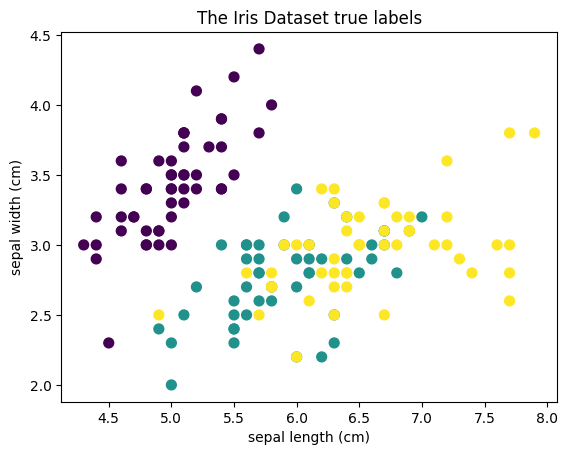

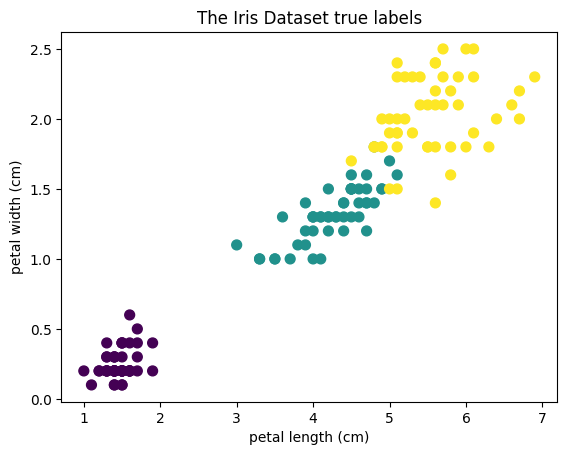

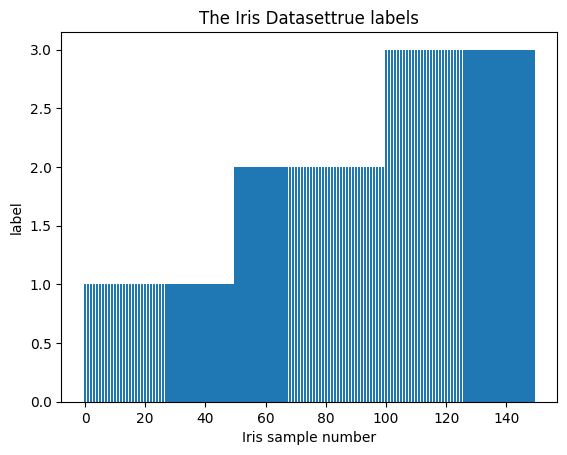

In [ ]:
# Plot the Iris data with the true label
trueLabels = Iris.target+1 # true labeling
names = Iris.feature_names
labelType = "true"
plotData(data, names,trueLabels,0,1,labelType)
plotData(data, names,trueLabels,2,3,labelType)
plotLabels(trueLabels,labelType)

## Section 3

In [ ]:
# Use the k-means algorithm to predict the data labels
k=3
kmeans = KMeans(n_clusters = k).fit(data)
predictedLabels = kmeans.predict(data)+1
centroids = kmeans.cluster_centers_

## Section 4

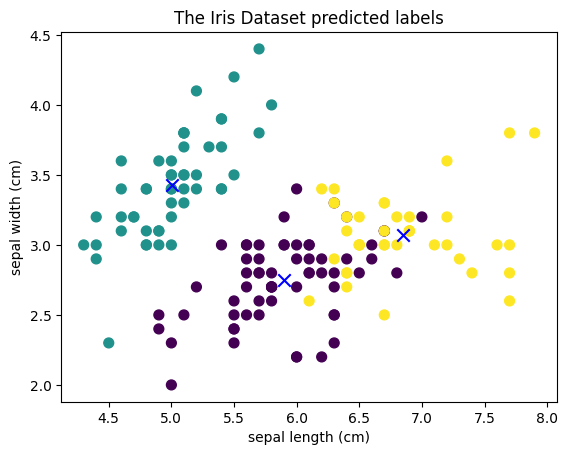

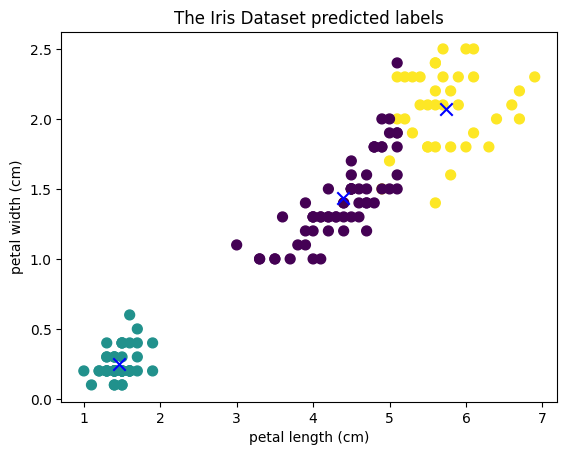

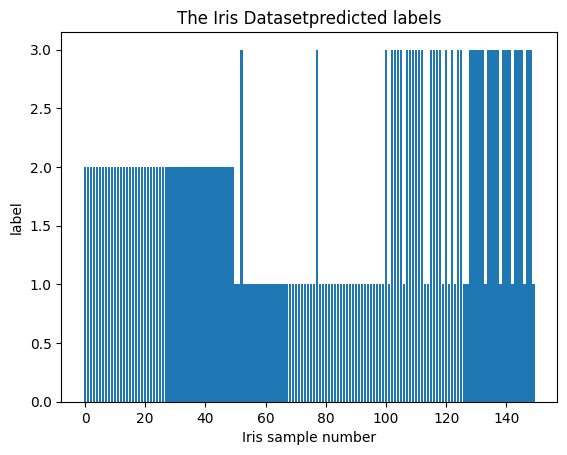

In [ ]:
labelType = "predicted"
# plot the predicted results for the 0-1 data colomns
plotData(data, names,predictedLabels,0,1,labelType,centroids)
# plot the predicted results for the 2-3 data colomns
plotData(data, names,predictedLabels,2,3,labelType,centroids)
plotLabels(predictedLabels,labelType)

# Section 5

In [ ]:
# Find the silhouette values and its avrrage
silhouetteAvg = silhouette_score(data, predictedLabels)
silhouetteValues = silhouette_samples(data, predictedLabels)

## Section 6

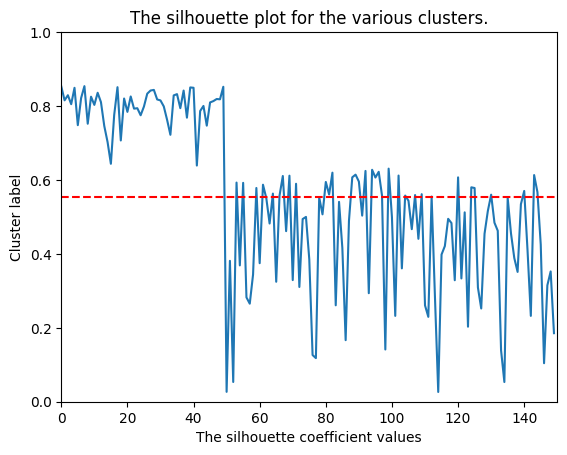

In [ ]:
#Plot the  silhouette results
plt.title("The silhouette plot for the various clusters.")
plt.xlabel("The silhouette coefficient values")
plt.ylabel("Cluster label")
plt.plot(silhouetteValues)
plt.axis([0,len(predictedLabels),0,1])

# plot the silhouette average line
plt.hlines(silhouetteAvg, 0, len(predictedLabels), colors='red', linestyles="--")
plt.show()

In [ ]:
print("For clusters =", k, "The average silhouette_score is: %.2f"  %silhouetteAvg)

For clusters = 3 The average silhouette_score is: 0.55


In [ ]:
trueLabels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3])

In [ ]:
predictedLabels

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 3, 3, 3, 3, 1, 3, 3, 3,
       3, 3, 3, 1, 1, 3, 3, 3, 3, 1, 3, 1, 3, 1, 3, 3, 1, 1, 3, 3, 3, 3,
       3, 1, 3, 3, 3, 3, 1, 3, 3, 3, 1, 3, 3, 3, 1, 3, 3, 1], dtype=int32)

In [94]:
correct_predictions = 0

for i in range(50):
    if trueLabels[i] == predictedLabels[i]:
        correct_predictions += 1

accuracy = (correct_predictions / 50) * 100

print(f"Accuracy for group 1: {accuracy}%")


Accuracy for group 1: 0.0%


In [97]:
wrong2_predictions = 0

for i in range(50, 100):
    if predictedLabels[i] == 3:
        correct_predictions += 1

percentage = (wrong2_predictions / 50) * 100

print(f"Percentage of flowers from group 3 predicted as group 2: {percentage:}%")

Percentage of flowers from group 3 predicted as group 2: 0.0%


In [98]:
wrong3_predictions = 0

for i in range(100, 150):
    if predictedLabels[i] == 2:
        correct_predictions += 1

percentage = (wrong3_predictions / 50) * 100

print(f"Percentage of flowers from group 3 predicted as group 2: {percentage}%")

Percentage of flowers from group 3 predicted as group 2: 0.0%
